# 고객 행동 예측
* 군집화

## 1. 데이터 확인

In [1]:
import pandas as pd

uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [2]:
customer = pd.read_csv('customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

## 2. 군집화를 통한 회원 그룹화

In [3]:
customer_clustering = customer[['mean','median','max','min','membership_period']]
customer_clustering.head()

mean  median  max  min  membership_period
0  4.833333     5.0    8    2                 47
1  5.083333     5.0    7    3                 47
2  4.583333     5.0    6    3                 47
3  4.833333     4.5    7    2                 47
4  3.916667     4.0    6    1                 47

* 'mean','median','max','min','membership_period'의 각 데이터 크기 차이가 크므로 표준화가 필요함

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering['cluster'] = clusters.labels_
print(customer_clustering['cluster'].unique())
customer_clustering.head()

[3 1 0 2]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


mean  median  max  min  membership_period  cluster
0  4.833333     5.0    8    2                 47        3
1  5.083333     5.0    7    3                 47        3
2  4.583333     5.0    6    3                 47        3
3  4.833333     4.5    7    2                 47        3
4  3.916667     4.0    6    1                 47        3

## 3. 군집화 결과 분석

In [5]:
customer_clustering.columns = ['월평균값','월중앙값','월최대값','월최소값','회원기간','cluster']
customer_clustering.groupby('cluster').count()

월평균값  월중앙값  월최대값  월최소값  회원기간
cluster                              
0        1334  1334  1334  1334  1334
1         763   763   763   763   763
2         846   846   846   846   846
3        1249  1249  1249  1249  1249

In [6]:
customer_clustering.groupby('cluster').mean()

월평균값      월중앙값       월최대값      월최소값       회원기간
cluster                                                    
0        5.524239  5.375187   8.745877  2.687406  14.843328
1        3.054713  2.888598   4.756225  1.653997   9.263434
2        8.054608  8.039598  10.009456  6.160757   7.072104
3        4.677494  4.671337   7.232986  2.153723  36.915933

## 4. 시각화
* 주성분분석

In [7]:
from sklearn.decomposition import PCA

X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']

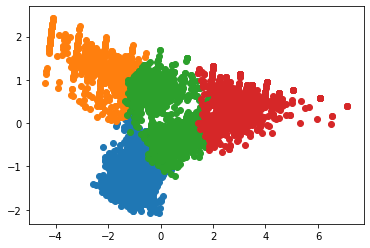

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in customer_clustering['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0], tmp[1])